The original K-means clustering problem does not have a specific label, our task is to find their labels so that points with the same label are close together to form a cluster.

Suppose $N$ data points in the training set are reassembled into $\textbf{X} = [\textbf{x}_1, \textbf{x}_2, \ldots, \textbf{x}_N]\in\mathbb{R}^{d\times N}$ and $K < N$ is the predetermined number of clusters. We need to find the centroids $\textbf{m}_1, \textbf{m}_2, \ldots, \textbf{m}_K\in\mathbb{R}^{d\times 1}$ and the label of each point data.

+ *One-hot coding* technique to represent the label of $\textbf{x}_i$:

For each point $\textbf{x}_i$, need to find the label $y_i = k, k\in \{1, 2, \ldots, K\}$. Each label $k$ is replaced by a row vector $\textbf{y}_i\in\mathbb{R}^{1\times K}$ - called the label vector. Specifically $y_{ij} = 0, \forall j\neq k$ and $y_{ik} = 1$. For example, if the data has a vector label of $[1, 0, 0, \ldots, 0]$ then it belongs to the first cluster. The constraint $\textbf{y}_i$ can be written mathematically as follows:

$$y_{ij}\in \{0, 1\}, \forall i, j: \sum_{j=1}^{K}y_{ij} = 1, \forall i$$

+ Loss function and optimization problem:

A data point $\textbf{x}_i$ when divided into cluster $k$ will have the error $(\textbf{x}_i - \textbf{m}_k)$, we will use distance measure 2 point is the Euclidean distance $||\textbf{x}_i - \textbf{m}_k||_2^2$. Then:

$$||\textbf{x}_i - \textbf{m}_k||_2^2 = y_{ik}||\textbf{x}_i - \textbf{m}_k||_2^2 = \sum_ {j=1}^Ky_{ij}||\textbf{x}_i - \textbf{m}_j||_2^2$$

Thus the average error for all data is:

$$\mathcal{L}(\textbf{Y}, \textbf{M}) = \frac{1}{N}\sum_{i=1}^K\sum_{j=1}^Ky_{ij}| |\textbf{x}_i - \textbf{m}_j||_2^2$$

Where $\textbf{M} = [\textbf{m}_1, \textbf{m}_2, \ldots, \textbf{m}_K]\in\mathbb{R}^{d\times K}$ is matrix created by $K$ centroid and $\textbf{Y}\in\mathbb{R}^{N\times K}$ is the label matrix.

In short, the problem to be optimized is:

$$\hat{\textbf{Y}}, \hat{\textbf{M}} = {\underset{\textbf{Y}, \textbf{M}}{\operatorname{arg\,min}}}\frac{ 1}{N}\sum_{i=1}^K\sum_{j=1}^Ky_{ij}||\textbf{x}_i - \textbf{m}_j||_2^2$$

+ Loss function optimization algorithm:

Fix $\textbf{M}$, find $\textbf{Y}$:

$$\hat{\textbf{y}_i}= {\underset{\textbf{y}_i}{\operatorname{arg\,min}}}\frac{ 1}{N}\sum_{j=1}^Ky_{ij}||\textbf{x}_i - \textbf{m}_j||_2^2$$

Because there is only one element in $\textbf{y}_i$ equal to $1$, the above problem is the problem of finding the closest centroid $\textbf{x}_i$: $j = {\underset{j}{\operatorname{arg\,min}}}||\textbf{x}_i - \textbf{m}_j||_2^2$.

Fix $\textbf{Y}$, find $\textbf{M}$:

$$\hat{\textbf{m}_j}= {\underset{\textbf{m}_j}{\operatorname{arg\,min}}}\frac{ 1}{N}\sum_{i=1}^Ky_{ij}||\textbf{x}_i - \textbf{m}_j||_2^2$$

Let $l(\textbf{m}_j) = \frac{1}{N}\sum_{i=1}^Ky_{ij}||\textbf{x}_i - \textbf{m}_j||_2 ^2$, we differentiate $l(\textbf{m}_j)$ and solve the equation:

$$\nabla_{\textbf{m}_j}l(\textbf{m}_j) = \frac{2}{N}\sum_{i=1}^Ky_{ij}(\textbf{m}_j - \textbf{x}_i) = 0\Leftrightarrow\textbf{m}_j\sum_{i=1}^Ky_{ij} = \sum_{i=1}^Ky_{ij}\textbf{x}_i\Leftrightarrow\textbf{m}_j = \frac{\sum_{i=1}^Ky_{ij}\textbf{x}_i}{\sum_{i=1}^Ky_{ij}}$$

+ Summary of K-means clustering algorithm:

$\textbf{Input}:$ Data matrix $\textbf{X}\in\mathbb{R}^{d\times N}$ and the number of clusters to find $K < N$.

$\textbf{Output}$: Matrix of centroids $\textbf{M}\in\mathbb{R}^{d\times K}$ and label matrix $\textbf{Y}\in\mathbb{R}^{N\times K}$.

1. Choose $K$ arbitrary points in the training set as the initial centroids.
2. Assign each data point to the cluster with the nearest centroid.
3. If the assignment of data points to each cluster in step 2 does not change compared to the previous iteration, then stop the algorithm.
4. Update the centroid for each cluster by taking the mean of all data points that were assigned to that cluster after step 2.
5. Go back to step 2.

+ Python example:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(18)

Generate data by taking points according to the expected normal distribution at $(2, 2), (8, 3)$ and $(3, 6)$, the covariance matrix is the same and is the unit matrix. Each cluster has 500 points. Display clusters of points on the graph.

In [4]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

N = 500

# `numpy.random.multivariate_normal`: https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis=0)
K = 3

original_label = np.array([0] * N + [1] * N + [2] * N).T

print('X = ', X)
print('Original label = ', original_label)

X =  [[2.07942844 4.19020236]
 [1.86510785 2.16051798]
 [2.44269784 2.62339144]
 ...
 [2.60566241 6.46771143]
 [4.67763675 5.55463181]
 [3.62801566 6.63056534]]
Original label =  [0 0 0 ... 2 2 2]


Write the `kmeans_display` function to display data. Then display the data according to the original label.

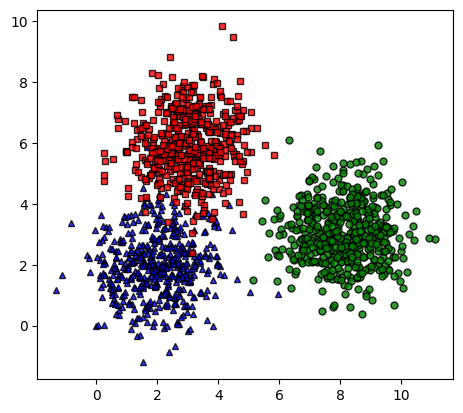

In [5]:
def kmeans_display(X, label):
  X0 = X[label == 0, :]
  X1 = X[label == 1, :]
  X2 = X[label == 2, :]

  kwargs = {"markersize": 5, "alpha": .8, "markeredgecolor": 'k'}
  plt.plot(X0[:, 0], X0[:, 1], 'b^', **kwargs)
  plt.plot(X1[:, 0], X1[:, 1], 'go', **kwargs)
  plt.plot(X2[:, 0], X2[:, 1], 'rs', **kwargs)

  plt.axis([-3, 14, -2, 10])
  plt.axis('scaled')

  plt.show()

kmeans_display(X, original_label) # Just an example

Write functions:

+ `kmeans_init_centroids` to initialize representative points.
+ `kmeans_assign_labels` to assign new labels to points corresponding to representative points.
+ `kmeans_update_centroids` to update new representative points on the newly labeled data.
+ `has_converged` to check the stopping condition of the algorithm.

In [6]:
def kmeans_init_centroids(X, k):
  # randomly pick k rows of X ans initial centroids
  return X[np.random.choice(X.shape[0], k)] # `numpy.random.choice`: https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

def kmeans_assign_labels(X, centroids):
  # Fix  M, find  Y
  # calculate pairwise distances btw data and centroids and return index of the closest centroid
  return np.argmin(cdist(X, centroids), axis=1) # `cdist` returns the distance between each point in X and each point in centroids.

def kmeans_update_centroids(X, labels, K):
  # Fix  Y, find  M
  centroids = np.zeros((K, X.shape[1]))
  for k in range(K):
      # collect all points assigned to the k-th cluster
      Xk = X[labels == k, :]
      # take average
      centroids[k, :] = np.mean(Xk, axis=0) # axis=0: mean of each column
  return centroids

def has_converged(list_of_centroids, new_list_of_centroids):
  # return True if two sets of centroids as the same
  return (set([tuple(a) for a in list_of_centroids]) == set([tuple(a) for a in new_list_of_centroids]))
  # Why do you use `set` and `tuple` here? --> Because `list` is not hashable, but `tuple` is. `set` requires its elements to be hashable.

In [7]:
def kmeans(X, K):
  list_of_centroids = [kmeans_init_centroids(X, K)]
  labels = []

  while True:
    labels.append(kmeans_assign_labels(X, list_of_centroids[-1]))
    new_list_of_centroids = kmeans_update_centroids(X, labels[-1], K)
    if has_converged(list_of_centroids[-1], new_list_of_centroids):
      break
    list_of_centroids.append(new_list_of_centroids)

  return (list_of_centroids, labels)

Centers found by our algorithm:
 [[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]


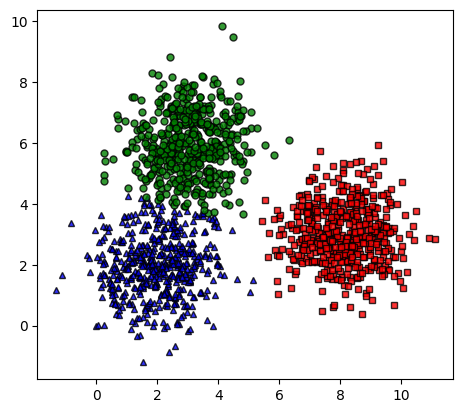

In [8]:
(centroids, labels) = kmeans(X, K)
print('Centers found by our algorithm:\n', centroids[-1])
kmeans_display(X, labels[-1])

From this result we see that the K-means Clustering algorithm works quite successfully, the found centroids are quite close to the initial expectations. Even though the colors of the two groups, green and red, have been swapped, the points that originally belonged to the same cluster almost still belong to the same cluster.

***The results are found by the `scikit-learn` library:***

Centers found by scikit-learn:
[[8.07476866 3.01494931]
 [3.02521978 5.94885115]
 [1.98112961 1.95794411]]


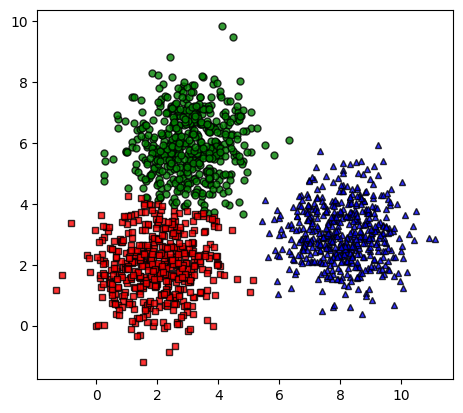

In [9]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:', model.cluster_centers_, sep='\n')
pred_label = model.predict(X)
kmeans_display(X, pred_label)

### Display the results after each loop

In [1]:
from scipy.spatial import Voronoi
from voronoi import voronoi_finite_polygons_2d

def kmeans_display_progress(X, centroids, labels, it):
    label = labels[it] # get the label of the it-th iteration
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    # # draw data points with color
    kwargs = {"markersize": 5, "alpha": 1, "markeredgecolor": 'k'}
    plt.plot(X0[:, 0], X0[:, 1], 'b^', **kwargs)
    plt.plot(X1[:, 0], X1[:, 1], 'go', **kwargs)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', **kwargs)

    # draw centroids 
    points = centroids[it]
    kwargs = {"markersize": 15, "markeredgecolor": 'k'}
    plt.plot(points[0, 0], points[0, 1], 'y^', **kwargs)
    plt.plot(points[1, 0], points[1, 1], 'yo', **kwargs)
    plt.plot(points[2, 0], points[2, 1], 'ys', **kwargs)

    # draw color for each voronoi region 
    colors = ['b', 'g', 'r']

    vor = Voronoi(points)
    regions, vertices = voronoi_finite_polygons_2d(vor, radius=1000) # `voronoi_finite_polygons_2d`: https://gist.github.com/pv/8036995
    print(f"Regions: {regions}\nVertices: {vertices}")
    for i, region in enumerate(regions):
        polygon = vertices[region]
        plt.fill(*zip(*polygon), alpha=.2, color=colors[i]) # `zip(*polygon)`: https://stackoverflow.com/a/7558990
    
    plt.axis('scaled')
    plt.title('iteration: %d/%d' %(it + 1, len(labels)))
    plt.axis([-2, 11, -2, 10])
    plt.show()


+ *Note:* `regions` and `vertices` are often used to represent Voronoi regions.

    + `regions`: A list of Voronoi regions, each represented by a list of vertex indices. Each peak index corresponds to a peak in the vertices list. For example, if regions is `[[0, 1, 2], [1, 2, 3]]`, then there are two Voronoi regions, the first of which has vertices at indices 0, 1, and 2 in the vertices list, and the second region has peaks at indices 1, 2, and 3.

    + `vertices`: A list of vertices, each represented by a tuple containing `x` and `y` coordinates. For example, if the vertices are `[(1, 2), (3, 4), (5, 6), (7, 8)]`, then there are a total of four vertices, the first vertex has coordinates `(1, 2)`, the second vertex has coordinates `(3, 4)`, and so on.

When combining `regions` and `vertices`, you can represent Voronoi regions as polygons with vertices at specified coordinates.

Regions: [[2, 0, 1], [4, 0, 3], [6, 5, 0]]
Vertices: [[   4.88286601    3.33969299]
 [-962.59174199  256.30783898]
 [ 174.60889618 -982.15159296]
 [ 508.42142647  867.31244611]
 [-962.59174199  256.30783898]
 [ 508.42142647  867.31244611]
 [ 174.60889618 -982.15159296]]


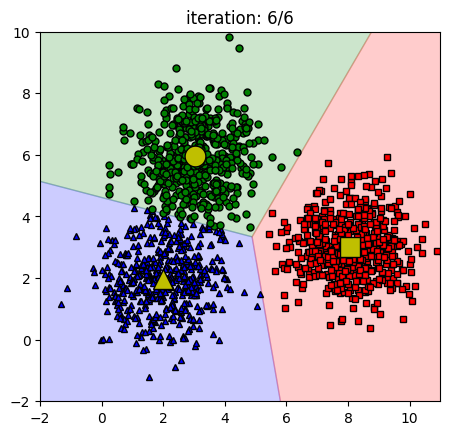

In [11]:
iters = range(5, 6)
for it in iters:
    kmeans_display_progress(X, centroids, labels, it)

+ The solutions found are not the same:

In [12]:
for i in range(60):
    np.random.seed(i)
    (centroids, labels) = kmeans(X, K)
    print(centroids[-1])
    print('seed number:', 9 * i, 'number of iterations:', len(labels))

[[8.78046073 2.78155578]
 [7.15025799 3.32261946]
 [2.48627752 3.975271  ]]
seed number: 0 number of iterations: 8
[[3.02702878 5.95686115]
 [1.9834967  1.96588127]
 [8.07476866 3.01494931]]
seed number: 9 number of iterations: 7
[[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]
seed number: 18 number of iterations: 7
[[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]
seed number: 27 number of iterations: 10
[[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]
seed number: 36 number of iterations: 7
[[8.07476866 3.01494931]
 [1.9834967  1.96588127]
 [3.02702878 5.95686115]]
seed number: 45 number of iterations: 14
[[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]
seed number: 54 number of iterations: 8
[[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]
seed number: 63 number of iterations: 7
[[8.07476866 3.01494931]
 [3.02702878 5.95686115]
 [1.9834967  1.9658812

10
Regions: [[2, 0, 1], [4, 0, 3], [6, 5, 0]]
Vertices: [[   4.88286601    3.33969299]
 [-962.59174199  256.30783898]
 [ 174.60889618 -982.15159296]
 [ 508.42142647  867.31244611]
 [-962.59174199  256.30783898]
 [ 508.42142647  867.31244611]
 [ 174.60889618 -982.15159296]]


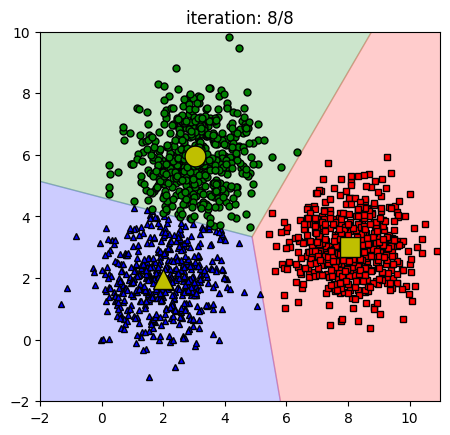

31
Regions: [[2, 0, 1], [4, 0, 3], [6, 5, 0]]
Vertices: [[   4.88286601    3.33969299]
 [ 508.42142647  867.31244611]
 [-962.59174199  256.30783898]
 [-962.59174199  256.30783898]
 [ 174.60889618 -982.15159296]
 [ 508.42142647  867.31244611]
 [ 174.60889618 -982.15159296]]


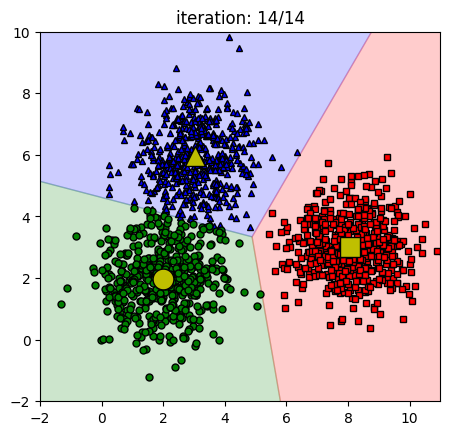

27
Regions: [[1, 0, 2], [3, 4, 0], [6, 5, 0]]
Vertices: [[   7.55998134   16.44747029]
 [-200.02524054 -961.76946662]
 [ 152.91854076 1005.82651252]
 [  38.63775418 -983.06949907]
 [ 152.91854076 1005.82651252]
 [  38.63775418 -983.06949907]
 [-200.02524054 -961.76946662]]


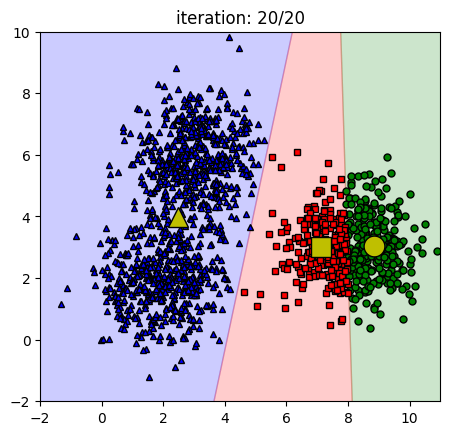

In [13]:
for i in [10, 31, 27]:
    np.random.seed(i)
    (centroids, labels) = kmeans(X, K)
    it = len(labels) - 1
    print(i)
    kmeans_display_progress(X, centroids, labels, it)

___
## **References:**

$[1].$ *Vũ Hữu Tiệp. Machine Learning cơ bản, Chapter 10, 2018.*